In [9]:
import numpy as np
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import cmaps

In [10]:
#  Read the CSV file and filter the dates
df = pd.read_csv('Data_TC/Proc/MJO_phase_amplitude.csv')
df['date'] = pd.to_datetime(df['date'])
filtered_df = df[
    (df['Amplitude'] > 1) & 
    (df['MJO_Phase'].isin([1, 8]))
]
selected_dates = filtered_df['date'].dt.date  

file_first_scripts = [
    'Data_TC/Spatial/Spatial/Track/week1_lag0_ddaily_track_density_five_degre.nc',
    'Data_TC/Spatial/Spatial/Track/week2_lag0_ddaily_track_density_five_degre.nc',
    'Data_TC/Spatial/Spatial/Track/week3_lag0_ddaily_track_density_five_degre.nc',  
    'Data_TC/Spatial/Spatial/Track/daily_track_density_Observation_five_degree.nc'
]

week1_81 = None
week2_81 = None
week3_81 = None
Obs_81 = None  

for i, file_first_script in enumerate(file_first_scripts):

    ds_first = Dataset(file_first_script)

    time_first = ds_first.variables['time'][:]
    lats = ds_first.variables['lat'][:]
    lons = ds_first.variables['lon'][:]

    time_units_first = ds_first.variables['time'].units
    calendar_first = ds_first.variables['time'].calendar if 'calendar' in ds_first.variables['time'].ncattrs() else 'gregorian'
    dates_first = num2date(time_first, units=time_units_first, calendar=calendar_first)

    dates_first = np.array([np.datetime64(dt.strftime('%Y-%m-%d')) for dt in dates_first])

    start_date = np.datetime64('1999-03-01')
    end_date = np.datetime64('2018-12-31')

    mask_first = (dates_first >= start_date) & (dates_first <= end_date)

    TCF_first = ds_first.variables['track_density'][mask_first, :, :]

    filtered_dates_first = dates_first[mask_first]

    selected_dates_np = np.array([np.datetime64(dt) for dt in selected_dates])
    mask_selected_dates = np.isin(filtered_dates_first, selected_dates_np)

    TCF_first_selected = TCF_first[mask_selected_dates, :, :]

    month_mask_north = (filtered_dates_first.astype('datetime64[M]').astype(int) % 12 + 1 >= 5) & (
        filtered_dates_first.astype('datetime64[M]').astype(int) % 12 + 1 <= 10
    )

    month_mask_south = (filtered_dates_first.astype('datetime64[M]').astype(int) % 12 + 1 <= 4) | (
        filtered_dates_first.astype('datetime64[M]').astype(int) % 12 + 1 >= 11
    )

    north_mask = lats >= 0  
    TCF_first_north = TCF_first_selected[month_mask_north[mask_selected_dates]][:, north_mask, :]

    south_mask = lats < 0  
    TCF_first_south = TCF_first_selected[month_mask_south[mask_selected_dates]][:, south_mask, :]

    sum_north = np.sum(TCF_first_north, axis=0)
    sum_south = np.sum(TCF_first_south, axis=0)

    result = np.full_like(TCF_first_selected[0, :, :], np.nan)  
    result[north_mask, :] = sum_north  
    result[south_mask, :] = sum_south  

    k = result * 1
    k_filtered_clipped = np.clip(k, 0, 100000)

    if i == 0:
        week1_81 = k_filtered_clipped/16
    elif i == 1:
        week2_81 = k_filtered_clipped/16
    elif i == 2:
        week3_81 = k_filtered_clipped/16
    elif i == 3:
        Obs_81 = k_filtered_clipped  



In [11]:
# Step 1: Read the CSV file and filter the dates
df = pd.read_csv('Data_TC/Proc/MJO_phase_amplitude.csv')
df['date'] = pd.to_datetime(df['date'])
filtered_df = df[
    (df['Amplitude'] > 1) & 
    (df['MJO_Phase'].isin([2, 3]))
]
selected_dates = filtered_df['date'].dt.date  

file_second_scripts = [
    'Data_TC/Spatial/Spatial/Track/week1_lag0_ddaily_track_density_five_degre.nc',
    'Data_TC/Spatial/Spatial/Track/week2_lag0_ddaily_track_density_five_degre.nc',
    'Data_TC/Spatial/Spatial/Track/week3_lag0_ddaily_track_density_five_degre.nc',  
    'Data_TC/Spatial/Spatial/Track/daily_track_density_Observation_five_degree.nc'
]

week1_23 = None
week2_23 = None
week3_23 = None
Obs_23 = None  

for i, file_second_script in enumerate(file_second_scripts):

    # Load the NetCDF files
    ds_second = Dataset(file_second_script)

    time_second = ds_second.variables['time'][:]
    lats = ds_second.variables['lat'][:]
    lons = ds_second.variables['lon'][:]

    time_units_second = ds_second.variables['time'].units
    calendar_second = ds_second.variables['time'].calendar if 'calendar' in ds_second.variables['time'].ncattrs() else 'gregorian'
    dates_second = num2date(time_second, units=time_units_second, calendar=calendar_second)

    dates_second = np.array([np.datetime64(dt.strftime('%Y-%m-%d')) for dt in dates_second])

    start_date = np.datetime64('1999-03-01')
    end_date = np.datetime64('2018-12-31')

    mask_second = (dates_second >= start_date) & (dates_second <= end_date)

    TCF_second = ds_second.variables['track_density'][mask_second, :, :]

    filtered_dates_second = dates_second[mask_second]

    selected_dates_np = np.array([np.datetime64(dt) for dt in selected_dates])
    mask_selected_dates = np.isin(filtered_dates_second, selected_dates_np)

    TCF_second_selected = TCF_second[mask_selected_dates, :, :]

    month_mask_north = (filtered_dates_second.astype('datetime64[M]').astype(int) % 12 + 1 >= 5) & (
        filtered_dates_second.astype('datetime64[M]').astype(int) % 12 + 1 <= 10
    )

    month_mask_south = (filtered_dates_second.astype('datetime64[M]').astype(int) % 12 + 1 <= 4) | (
        filtered_dates_second.astype('datetime64[M]').astype(int) % 12 + 1 >= 11
    )

    north_mask = lats >= 0  
    TCF_second_north = TCF_second_selected[month_mask_north[mask_selected_dates]][:, north_mask, :]

    south_mask = lats < 0  
    TCF_second_south = TCF_second_selected[month_mask_south[mask_selected_dates]][:, south_mask, :]

    sum_north = np.sum(TCF_second_north, axis=0)
    sum_south = np.sum(TCF_second_south, axis=0)

    result = np.full_like(TCF_second_selected[0, :, :], np.nan)  
    result[north_mask, :] = sum_north  
    result[south_mask, :] = sum_south  

    k = result * 1
    k_filtered_clipped = np.clip(k, 0, 100000)

    if i == 0:
        week1_23 = k_filtered_clipped/16
    elif i == 1:
        week2_23 = k_filtered_clipped/16
    elif i == 2:
        week3_23 = k_filtered_clipped/16
    elif i == 3:
        Obs_23 = k_filtered_clipped  



In [12]:
# Step 1: Read the CSV file and filter the dates
df = pd.read_csv('Data_TC/Proc/MJO_phase_amplitude.csv')
df['date'] = pd.to_datetime(df['date'])
filtered_df = df[
    (df['Amplitude'] > 1) & 
    (df['MJO_Phase'].isin([4, 5]))
]
selected_dates = filtered_df['date'].dt.date  

file_third_scripts = [
    'Data_TC/Spatial/Spatial/Track/week1_lag0_ddaily_track_density_five_degre.nc',
    'Data_TC/Spatial/Spatial/Track/week2_lag0_ddaily_track_density_five_degre.nc',
    'Data_TC/Spatial/Spatial/Track/week3_lag0_ddaily_track_density_five_degre.nc',  
    'Data_TC/Spatial/Spatial/Track/daily_track_density_Observation_five_degree.nc'
]

# Initialize lists to store results for each week
week1_45 = None
week2_45 = None
week3_45 = None
Obs_45 = None  


for i, file_third_script in enumerate(file_third_scripts):

    ds_third = Dataset(file_third_script)

    time_third = ds_third.variables['time'][:]
    lats = ds_third.variables['lat'][:]
    lons = ds_third.variables['lon'][:]

    time_units_third = ds_third.variables['time'].units
    calendar_third = ds_third.variables['time'].calendar if 'calendar' in ds_third.variables['time'].ncattrs() else 'gregorian'
    dates_third = num2date(time_third, units=time_units_third, calendar=calendar_third)

    dates_third = np.array([np.datetime64(dt.strftime('%Y-%m-%d')) for dt in dates_third])

    start_date = np.datetime64('1999-03-01')
    end_date = np.datetime64('2018-12-31')

    mask_third = (dates_third >= start_date) & (dates_third <= end_date)


    TCF_third = ds_third.variables['track_density'][mask_third, :, :]

    filtered_dates_third = dates_third[mask_third]


    selected_dates_np = np.array([np.datetime64(dt) for dt in selected_dates])
    mask_selected_dates = np.isin(filtered_dates_third, selected_dates_np)

    TCF_third_selected = TCF_third[mask_selected_dates, :, :]

    month_mask_north = (filtered_dates_third.astype('datetime64[M]').astype(int) % 12 + 1 >= 5) & (
        filtered_dates_third.astype('datetime64[M]').astype(int) % 12 + 1 <= 10
    )

    month_mask_south = (filtered_dates_third.astype('datetime64[M]').astype(int) % 12 + 1 <= 4) | (
        filtered_dates_third.astype('datetime64[M]').astype(int) % 12 + 1 >= 11
    )

    north_mask = lats >= 0  
    TCF_third_north = TCF_third_selected[month_mask_north[mask_selected_dates]][:, north_mask, :]

    south_mask = lats < 0  
    TCF_third_south = TCF_third_selected[month_mask_south[mask_selected_dates]][:, south_mask, :]

    sum_north = np.sum(TCF_third_north, axis=0)
    sum_south = np.sum(TCF_third_south, axis=0)

    result = np.full_like(TCF_third_selected[0, :, :], np.nan)  
    result[north_mask, :] = sum_north  
    result[south_mask, :] = sum_south  

    k = result * 1
    k_filtered_clipped = np.clip(k, 0, 100000)

    if i == 0:
        week1_45 = k_filtered_clipped/16
    elif i == 1:
        week2_45 = k_filtered_clipped/16
    elif i == 2:
        week3_45 = k_filtered_clipped/16
    elif i == 3:
        Obs_45 = k_filtered_clipped  



In [13]:
# Step 1: Read the CSV file and filter the dates
df = pd.read_csv('Data_TC/Proc/MJO_phase_amplitude.csv')
df['date'] = pd.to_datetime(df['date'])
filtered_df = df[
    (df['Amplitude'] > 1) & 
    (df['MJO_Phase'].isin([6, 7]))
]
selected_dates = filtered_df['date'].dt.date  

file_four_scripts = [
    'Data_TC/Spatial/Spatial/Track/week1_lag0_ddaily_track_density_five_degre.nc',
    'Data_TC/Spatial/Spatial/Track/week2_lag0_ddaily_track_density_five_degre.nc',
    'Data_TC/Spatial/Spatial/Track/week3_lag0_ddaily_track_density_five_degre.nc',  
    'Data_TC/Spatial/Spatial/Track/daily_track_density_Observation_five_degree.nc'
]

week1_67 = None
week2_67 = None
week3_67 = None
Obs_67 = None  

for i, file_four_script in enumerate(file_four_scripts):

    # Load the NetCDF files
    ds_four = Dataset(file_four_script)

    time_four = ds_four.variables['time'][:]
    lats = ds_four.variables['lat'][:]
    lons = ds_four.variables['lon'][:]

    time_units_four = ds_four.variables['time'].units
    calendar_four = ds_four.variables['time'].calendar if 'calendar' in ds_four.variables['time'].ncattrs() else 'gregorian'
    dates_four = num2date(time_four, units=time_units_four, calendar=calendar_four)

    dates_four = np.array([np.datetime64(dt.strftime('%Y-%m-%d')) for dt in dates_four])

    start_date = np.datetime64('1999-03-01')
    end_date = np.datetime64('2018-12-31')

    mask_four = (dates_four >= start_date) & (dates_four <= end_date)

    TCF_four = ds_four.variables['track_density'][mask_four, :, :]

    filtered_dates_four = dates_four[mask_four]

    selected_dates_np = np.array([np.datetime64(dt) for dt in selected_dates])
    mask_selected_dates = np.isin(filtered_dates_four, selected_dates_np)

    TCF_four_selected = TCF_four[mask_selected_dates, :, :]

    month_mask_north = (filtered_dates_four.astype('datetime64[M]').astype(int) % 12 + 1 >= 5) & (
        filtered_dates_four.astype('datetime64[M]').astype(int) % 12 + 1 <= 10
    )

    month_mask_south = (filtered_dates_four.astype('datetime64[M]').astype(int) % 12 + 1 <= 4) | (
        filtered_dates_four.astype('datetime64[M]').astype(int) % 12 + 1 >= 11
    )

    north_mask = lats >= 0  
    TCF_four_north = TCF_four_selected[month_mask_north[mask_selected_dates]][:, north_mask, :]

    south_mask = lats < 0  
    TCF_four_south = TCF_four_selected[month_mask_south[mask_selected_dates]][:, south_mask, :]

    sum_north = np.sum(TCF_four_north, axis=0)
    sum_south = np.sum(TCF_four_south, axis=0)

    # Create a full grid for the mean bias
    result = np.full_like(TCF_four_selected[0, :, :], np.nan)  
    result[north_mask, :] = sum_north  
    result[south_mask, :] = sum_south  

    k = result * 1
    k_filtered_clipped = np.clip(k, 0, 100000)

    if i == 0:
        week1_67 = k_filtered_clipped/16
    elif i == 1:
        week2_67 = k_filtered_clipped/16
    elif i == 2:
        week3_67 = k_filtered_clipped/16
    elif i == 3:
        Obs_67 = k_filtered_clipped  



In [14]:
# Step 1: Read the CSV file and filter the dates
df = pd.read_csv('Data_TC/Proc/MJO_phase_amplitude.csv')
df['date'] = pd.to_datetime(df['date'])
filtered_df = df[
    (df['Amplitude'] > 1) & 
    (df['MJO_Phase'].isin([1,2,3,4,5,6,7,8]))
]
selected_dates = filtered_df['date'].dt.date  

# Define paths to the NetCDF files
file_all_scripts = [
    'Data_TC/Spatial/Spatial/Track/week1_lag0_ddaily_track_density_five_degre.nc',
    'Data_TC/Spatial/Spatial/Track/week2_lag0_ddaily_track_density_five_degre.nc',
    'Data_TC/Spatial/Spatial/Track/week3_lag0_ddaily_track_density_five_degre.nc',  
    'Data_TC/Spatial/Spatial/Track/daily_track_density_Observation_five_degree.nc'
]

week1_all = None
week2_all = None
week3_all = None
Obs_all = None  

for i, file_all_script in enumerate(file_all_scripts):

    ds_all = Dataset(file_all_script)

    time_all = ds_all.variables['time'][:]
    lats = ds_all.variables['lat'][:]
    lons = ds_all.variables['lon'][:]

    time_units_all = ds_all.variables['time'].units
    calendar_all = ds_all.variables['time'].calendar if 'calendar' in ds_all.variables['time'].ncattrs() else 'gregorian'
    dates_all = num2date(time_all, units=time_units_all, calendar=calendar_all)

    dates_all = np.array([np.datetime64(dt.strftime('%Y-%m-%d')) for dt in dates_all])

    start_date = np.datetime64('1999-03-01')
    end_date = np.datetime64('2018-12-31')

    mask_all = (dates_all >= start_date) & (dates_all <= end_date)

    TCF_all = ds_all.variables['track_density'][mask_all, :, :]

    filtered_dates_all = dates_all[mask_second]

    selected_dates_np = np.array([np.datetime64(dt) for dt in selected_dates])
    mask_selected_dates = np.isin(filtered_dates_all, selected_dates_np)

    TCF_all_selected = TCF_all[mask_selected_dates, :, :]

    month_mask_north = (filtered_dates_all.astype('datetime64[M]').astype(int) % 12 + 1 >= 5) & (
        filtered_dates_all.astype('datetime64[M]').astype(int) % 12 + 1 <= 10
    )

    month_mask_south = (filtered_dates_all.astype('datetime64[M]').astype(int) % 12 + 1 <= 4) | (
        filtered_dates_all.astype('datetime64[M]').astype(int) % 12 + 1 >= 11
    )

    north_mask = lats >= 0  
    TCF_all_north = TCF_all_selected[month_mask_north[mask_selected_dates]][:, north_mask, :]

    south_mask = lats < 0  
    TCF_all_south = TCF_all_selected[month_mask_south[mask_selected_dates]][:, south_mask, :]

    sum_north = np.sum(TCF_all_north, axis=0)
    sum_south = np.sum(TCF_all_south, axis=0)

    # Create a full grid for the mean bias
    result = np.full_like(TCF_all_selected[0, :, :], np.nan)  
    result[north_mask, :] = sum_north 
    result[south_mask, :] = sum_south  

    # Scale the data
    k = result * 1
    k_filtered_clipped = np.clip(k, 0, 100000)

    # Store the results for each week
    if i == 0:
        week1_all = k_filtered_clipped/64
    elif i == 1:
        week2_all = k_filtered_clipped/64
    elif i == 2:
        week3_all = k_filtered_clipped/64
    elif i == 3:
        Obs_all = k_filtered_clipped/4 # Store results for the new file



In [15]:
phase_81_obs=(Obs_81-Obs_all)/Obs_all
phase_81_week1=(week1_81-week1_all)/week1_all
phase_81_week2=(week2_81-week2_all)/week2_all
phase_81_week3=(week3_81-week3_all)/week3_all

phase_23_obs=(Obs_23-Obs_all)/Obs_all
phase_23_week1=(week1_23-week1_all)/week1_all
phase_23_week2=(week2_23-week2_all)/week2_all
phase_23_week3=(week3_23-week3_all)/week3_all

phase_45_obs=(Obs_45-Obs_all)/Obs_all
phase_45_week1=(week1_45-week1_all)/week1_all
phase_45_week2=(week2_45-week2_all)/week2_all
phase_45_week3=(week3_45-week3_all)/week3_all

phase_67_obs=(Obs_67-Obs_all)/Obs_all
phase_67_week1=(week1_67-week1_all)/week1_all
phase_67_week2=(week2_67-week2_all)/week2_all
phase_67_week3=(week3_67-week3_all)/week3_all

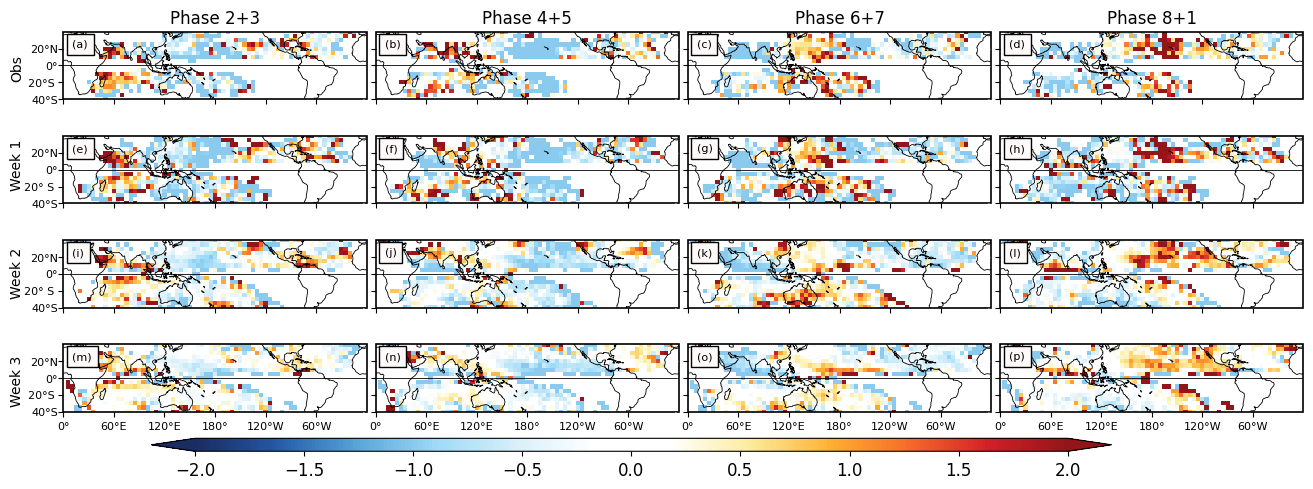

In [16]:
# Define the extent and other plotting parameters
lon_min = 0
lon_max = 360
lat_min = -40
lat_max = 40

lat = np.linspace(lat_min, lat_max, 17)  
lon = np.linspace(lon_min, lon_max, 73)  
lon_grid_mesh, lat_grid_mesh = np.meshgrid(lon, lat)

extent = [lon_min, lon_max, lat_min, lat_max]

fig, axes = plt.subplots(4, 4, figsize=(16, 5.4),
                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)},
                         gridspec_kw={'height_ratios': [1, 1, 1, 1], 'hspace': 0.01, 'wspace': 0.03})

ax1, ax2, ax3, ax4 = axes[0, 0], axes[0, 1], axes[0, 2], axes[0, 3]
ax5, ax6, ax7, ax8 = axes[1, 0], axes[1, 1], axes[1, 2], axes[1, 3]
ax9, ax10, ax11, ax12 = axes[2, 0], axes[2, 1], axes[2, 2], axes[2, 3]
ax13, ax14, ax15, ax16 = axes[3, 0], axes[3, 1], axes[3, 2], axes[3, 3]


def format_axis(ax, row):
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, linewidth=0.6, edgecolor="k")
    ax.add_feature(cfeature.LAND, color="white") #color="white"
    ax.add_feature(cfeature.OCEAN, color="white")
    
    parallels = np.arange(-40, 40, 20)  
    meridians = np.arange(0, 360, 60)  
    ax.set_yticks(parallels, crs=ccrs.PlateCarree())
    ax.set_xticks(meridians, crs=ccrs.PlateCarree())
    
    y_label_size = 0 if row == 0 else 0.00001
    ax.tick_params(axis='y', labelsize=y_label_size, labelcolor='white')

    x_label_size = 0 if row == 3 else 0.00001
    ax.tick_params(axis='x', labelsize=x_label_size, labelcolor='white')


data_list = [phase_23_obs, phase_45_obs, phase_67_obs, phase_81_obs,
             phase_23_week1, phase_45_week1, phase_67_week1, phase_81_week1,
             phase_23_week2, phase_45_week2, phase_67_week2, phase_81_week2,
             phase_23_week3, phase_45_week3, phase_67_week3, phase_81_week3]

import matplotlib.colors as mcolors
levels = np.linspace(-2, 2, 100)  


import numpy.ma as ma 

for idx, (ax, data) in enumerate(zip(axes.flat, data_list)):
    row = idx // 4  
    format_axis(ax, row)  

    masked_data = ma.masked_where(data == 0, data)
    
    pcolormesh = ax.pcolormesh(lon_grid_mesh, lat_grid_mesh, masked_data,
                               cmap=cmaps.BlueWhiteOrangeRed, vmin=-2, vmax=2, transform=ccrs.PlateCarree()) #cmaps.BlueWhiteOrangeRed


ax13.set_extent([0, 360, lat_min, lat_max], crs=ccrs.PlateCarree())

ax13.set_xticklabels(['0°', '60°E', '120°E', '180°', '120°W', '60°W'])
ax14.set_xticklabels(['0°', '60°E', '120°E', '180°', '120°W', '60°W'])
ax15.set_xticklabels(['0°', '60°E', '120°E', '180°', '120°W', '60°W'])
ax16.set_xticklabels(['0°', '60°E', '120°E', '180°', '120°W', '60°W'])

ax13.tick_params(axis='x', labelsize=8, labelcolor='black')  
ax14.tick_params(axis='x', labelsize=8, labelcolor='black')  
ax15.tick_params(axis='x', labelsize=8, labelcolor='black')  
ax16.tick_params(axis='x', labelsize=8, labelcolor='black')  


ax1.set_yticklabels(['40°S', '20°S ', '0°', '20°N'])
ax5.set_yticklabels(['40°S', '20° S ', '0°', '20°N'])
ax9.set_yticklabels(['40°S', '20° S ', '0°', '20°N'])
ax13.set_yticklabels(['40°S', '20°S ', '0°', '20°N'])


ax1.tick_params(axis='y', labelsize=8, labelcolor='black',pad=0.5)  
ax5.tick_params(axis='y', labelsize=8, labelcolor='black',pad=0.5)  
ax9.tick_params(axis='y', labelsize=8, labelcolor='black',pad=0.5)  
ax13.tick_params(axis='y', labelsize=8, labelcolor='black',pad=0.5)  


fig.text(0.096, 0.78, 'Obs', ha='center', va='center', rotation='vertical',fontsize=10)
fig.text(0.096, 0.6, 'Week 1', ha='center', va='center', rotation='vertical',fontsize=10)
fig.text(0.096, 0.4, 'Week 2', ha='center', va='center', rotation='vertical',fontsize=10)
fig.text(0.096, 0.2, 'Week 3', ha='center', va='center', rotation='vertical',fontsize=10)

ax1.set_title('Phase 2+3', fontsize=12,loc='center')
ax2.set_title('Phase 4+5', fontsize=12,loc='center')
ax3.set_title('Phase 6+7', fontsize=12,loc='center')
ax4.set_title('Phase 8+1', fontsize=12,loc='center')


axes_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]

for i, ax in enumerate(axes_list):
    label = f'({chr(97 + i)})'  
    ax.text(0.03, 0.77, label, transform=ax.transAxes, fontsize=8, color='k', 
            bbox=dict(facecolor='snow', alpha=1, edgecolor='k'))


axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]
for ax in axes:
    ax.axhline(0, color='k', linewidth=0.6)
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
    

cbar_axx = fig.add_axes([0.180, 0.07, 0.6, 0.024])  
cbarr = fig.colorbar(pcolormesh, cax=cbar_axx, orientation='horizontal', extend='both', drawedges=False)
cbarr.ax.tick_params(labelsize=12)

#plt.subplots_adjust(wspace=0.05, hspace=0.14)
#plt.savefig('Figures/Supplementary/FigureS6.png', dpi=400, bbox_inches='tight')
plt.show()
